In [2]:
import pandas as pd

In [3]:
df_netflix = pd.read_csv("netflix daily top 10.csv")

In [8]:
df_netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,2019-03-28,9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55


In [6]:
#Convertendo coluna para formato de data
df_netflix['As of'] = pd.to_datetime(df_netflix['As of'])

In [7]:
#Convertendo coluna para formato de data
df_netflix['Netflix Release Date'] = pd.to_datetime(df_netflix['Netflix Release Date'])

In [9]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


### O tamanho da base é de 554.8 KB. Possui 10 colunas e 7100 linhas

### Definindo tipos de variáveis.

Numéricas discretas: Days in top 10 e Viewership Score | Categóricas Ordinais: Rank, Year to Date Rank, Last Week Rank | Categóricas Nominais: Title, Type, Netflix Exclusive.

In [18]:
# Verificando período de análise
maior_data = df_netflix['As of'].max()
menor_data = df_netflix['As of'].min()

print(menor_data, maior_data)

2020-04-01 00:00:00 2022-03-11 00:00:00


### O período de análise desse relatório é de 01/04/2020 até 11/03/2022

In [19]:
df_dados_nulos = df_netflix[df_netflix.isna().any(axis=1)]

In [22]:
df_dados_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2501 entries, 2 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 2501 non-null   datetime64[ns]
 1   Rank                  2501 non-null   int64         
 2   Year to Date Rank     2501 non-null   object        
 3   Last Week Rank        2501 non-null   object        
 4   Title                 2501 non-null   object        
 5   Type                  2501 non-null   object        
 6   Netflix Exclusive     0 non-null      object        
 7   Netflix Release Date  2501 non-null   datetime64[ns]
 8   Days In Top 10        2501 non-null   int64         
 9   Viewership Score      2501 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 214.9+ KB


### Ao coletar as informações do dataframe no início já foi possível identificar que tínhamos dados nulos na coluna Netflix Exclusive, nessa caso apenas filtrei todas as linhas e coloquei em um novo dataframe

<AxesSubplot:>

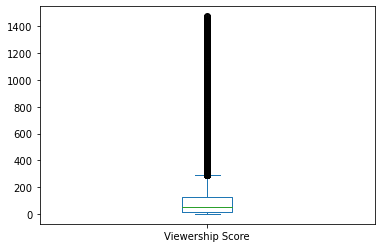

In [29]:
# Coletando Outliers na coluna Viewership Score

df_netflix.plot.box(column='Viewership Score')

In [30]:
numero_outliers = len(df_netflix[(df_netflix['Viewership Score'] > 350)])
numero_outliers

561

### Podemos dizer que os valores acima de 350 são considerados outliers, e no dataframe com 7100 linhas temos 561 outliers

Viewership Score    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

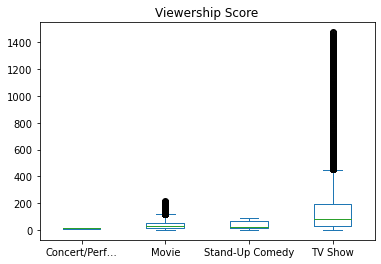

In [31]:
# Verificando outliers por categoria

df_netflix.plot.box(column='Viewership Score', by='Type')

### Podemos dizer também que os maiores outliers estão na categoria Tv Show